# Implementing regression using Python libraries.
We will now look at some python libraries that implements linear regression for us. As we've seen, our manual regression does not include polynomial terms (although this would just be a new column so easy to do) nor do we implement lasso or ridge regression.
<br><br>

One of the most popular ML packages in Python is `scikit-learn`, which is built on Numpy. If we need more functionality beyond what scikit can provide then we should look at `statsmodels`.

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simple Linear Regression
Our 3 main methods are:
* model.`fit`(x,y)
* model.`score`(x,y)
* model.`predict`(x)

We first create some dummy data

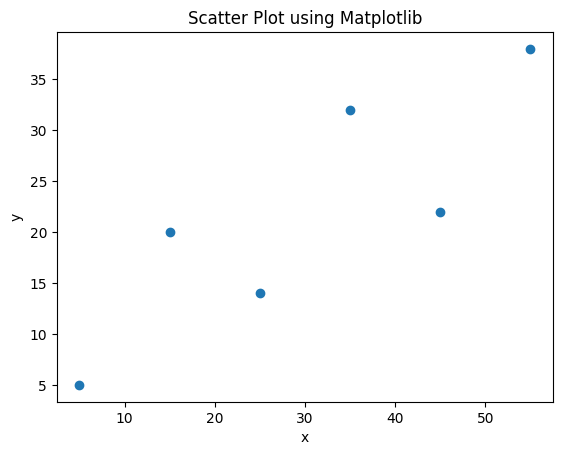

(6, 1)
(6,)


In [5]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) #To get one column and any number of rows
y = np.array([5, 20, 14, 32, 22, 38])
plt.scatter(x.flatten(), y)
plt.title('Scatter Plot using Matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(x.shape)
print(y.shape)


Create an instance of the LinearRegression class. We can pass it several parameters, if needed:
<br>
* `fit_intercept` is a Bool. True (default) = model will calculate intercept (B0). False = B0 will be 0.
* `normalize`. If True will normalize values. If False (default) no normalization will be done.
* `copy_X`. If True (default) it will copy input variables. If False it will overwrite them.
* `n_jobs` are the number of jobs to run in parallel. Default is None i.e. one job.

In [6]:
model = LinearRegression()
model = model.fit(x,y) #Will return itself
model

LinearRegression()

Once we have fitted the model, we can go ahead and check the results. We can get *R*<sup>2</sup> using `.score(x, y)`. Note, score also needs the predictor and response as arguments.

In [7]:
r_sq = model.score(x, y)
print("Coefficient of Determination: ", r_sq)

Coefficient of Determination:  0.7158756137479542


We can then pull out our weights (Beta coefficients) using model **attributes**. In scikit, attributes with an `_` are estimated.

In [8]:
print("Intercept:", model.intercept_.round(2))
print("B1: ", model.coef_.round(2))

Intercept: 5.63
B1:  [0.54]


Once we have a model that we are happy with, we can go ahead and make predictions using the model.

In [9]:
y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

We could have done this manually too:

In [10]:
y_pred = model.intercept_ + model.coef_*x
y_pred

array([[ 8.33333333],
       [13.73333333],
       [19.13333333],
       [24.53333333],
       [29.93333333],
       [35.33333333]])

Let's quantify the error in the model

In [11]:
def RMSE(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

14.2777993947091


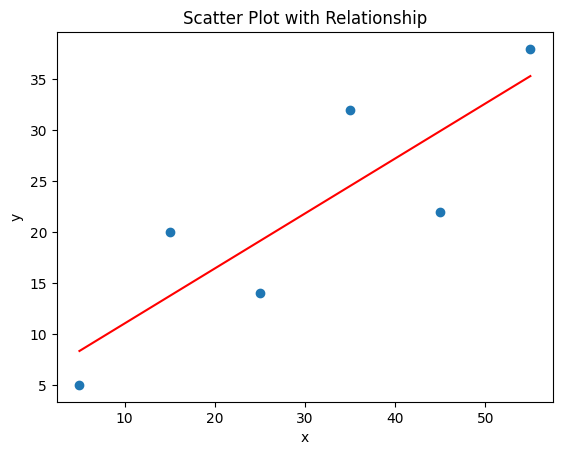

In [12]:
print(RMSE(y_pred,y))
plt.scatter(x.flatten(), y, label = "y")
plt.plot(x.flatten(), y_pred, label = "y_pred", color = "red") #Change between `plot` and `scatter` to see different versions of the graph :)
plt.title('Scatter Plot with Relationship')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# MLR

In [13]:
x = [
    [0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]
    ]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
x, y

(array([[ 0,  1],
        [ 5,  1],
        [15,  2],
        [25,  5],
        [35, 11],
        [45, 15],
        [55, 34],
        [60, 35]]),
 array([ 4,  5, 20, 14, 32, 22, 38, 43]))

In [14]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print("Coefficient of Determination: ", r_sq)
print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)
y_pred = model.predict(x)
print("RMSE: ", RMSE(y, y_pred))

Coefficient of Determination:  0.8615939258756776
Intercept: 5.52257927519819
Coefficients:  [0.44706965 0.25502548]
RMSE:  5.055874980142981


# Polynomial Regression
We now need a class from the `sklearn preprocessing` library. This takes a few arguments:
* `degree` = degree of the polynomial regression function
* `interaction_only` = Decided whether to include only interaction features (True) or all features (False - default)
* `include_bias` = Include column of 1 for intercept (True - default) or not (False)

In [15]:
from sklearn.preprocessing import PolynomialFeatures


We create dummy data and create an instance of the `PolynomialFeatures` class and fit the data to this class.

In [16]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)

PolynomialFeatures(include_bias=False)

Once this is done, we can transform the input array

In [17]:
x_ = transformer.transform(x)

A shortcut to the above would be:

In [18]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_ 

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

As we can see, we now have the polynomial term as expected. We can go ahead and fit the model

In [19]:
model = LinearRegression().fit(x_, y)
r_sq = model.score(x_, y)
print("Coefficient of Determination: ", r_sq)
print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)
y_pred = model.predict(x_)
print("RMSE: ", RMSE(y, y_pred))

Coefficient of Determination:  0.8908516262498563
Intercept: 21.372321428571436
Coefficients:  [-1.32357143  0.02839286]
RMSE:  3.3624325095014753


# Ridge Regression

This works similarly to the base linear models in terms of the functions used to train the model.

In [41]:
x = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]
x, y = np.array(x), np.array(y)

from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=0.5)
reg_ridge.fit(x,y)

reg_base = LinearRegression()
reg_base.fit(x,y)

print("Ridge coefficients:", reg_ridge.coef_)
print("Base coefficients:", reg_base.coef_)
print("Tip: Play around with the Alpha value to see the effect it has on parameters. ^^^")

Ridge coefficients: [0.34545455 0.34545455]
Base coefficients: [0.475 0.475]
Tip: Play around with the Alpha value to see the effect it has on parameters. ^^^


## As a classifier
Ridge also has a classifier variant called `RidgeClassifier`. It works by setting binary targets to {-1, 1} and treats it as a regression task optimising the same objective as usual. The sign of the regressor's prediction is the corresponding class. While we would normally use `LogisticRegression` for this, least squares regression is more efficient for a large number of classes.

## Plot Coefficients as a function of regularization paramater (Alpha)

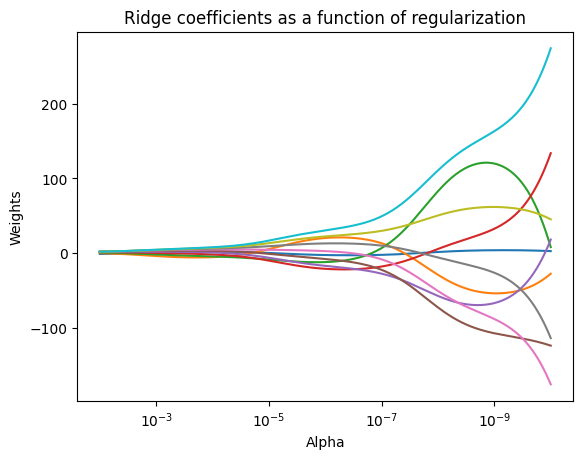

In [63]:
# Generate random data
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

n_alphas = 200 #number of alphas
alphas = np.logspace(-10, -2, n_alphas)

coefs = [] #Holder

# Get coefficients for each alpha
for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Display results
ax = plt.gca() #Get current axis
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Ridge coefficients as a function of regularization")
plt.axis("tight")
plt.show()

## Cross Validation
We can find the optimal alpha value using Leave-Out-One Cross Validation (`LOOCV`) through the `RidgeCV` method. IN `RidgeCV` we can specify a `cv` value which will become the number of folds to use in the CV. E.g. `cv = 10` means a 10-fold cross-validation.

In [69]:
from sklearn.linear_model import RidgeCV
x = [[0, 0], [0, 0], [1, 1]]
y = [0, .1, 1]
x, y = np.array(x), np.array(y)

reg = RidgeCV(alphas = np.logspace(-10, -2, n_alphas))
reg.fit(x, y)
reg.alpha_

0.01

# Lasso

In [74]:
from sklearn.linear_model import Lasso

x = [[0, 0], [1, 1]]
y = [0, 1]
x, y = np.array(x), np.array(y)

reg = Lasso(alpha = 0.1)
reg.fit(x, y)
print(reg.coef_)
reg.predict([[1, 1]])


[0.6 0. ]


array([0.8])

## CV
We can set up the CV in the same way we would Ridge however we can also use the `AIC` (Akaike Information Criteria) or the `BIC` (Bayes Information Criteria) as a computationally more efficient alternative to finding the optimal alternative.

# Elastic Net
This is a combination of L1 and L2 (Lasso and Ridge) Regression where we control the combination using the `l1_ratio` parameter (if `1` then L1 penalty, if `0` then L2 penalty). It is especially useful when we have correlated features. In Lasso, we woudld likely pick one at random but in Elastic we keep both.

In [86]:
from sklearn.linear_model import ElasticNet

x = [[0,0], [1, 1], [2, 2]]
y = [0, 1, 2]
x, y = np.array(x), np.array(y)

reg = ElasticNet(alpha=0.5, l1_ratio=0.5)
reg.fit(x, y)
reg.coef_

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

c:\Users\shayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.478e-03, tolerance: 5.000e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\shayl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.222e-04, tolerance: 5.000e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\shayl\AppData\Local\Programs\Python\Python

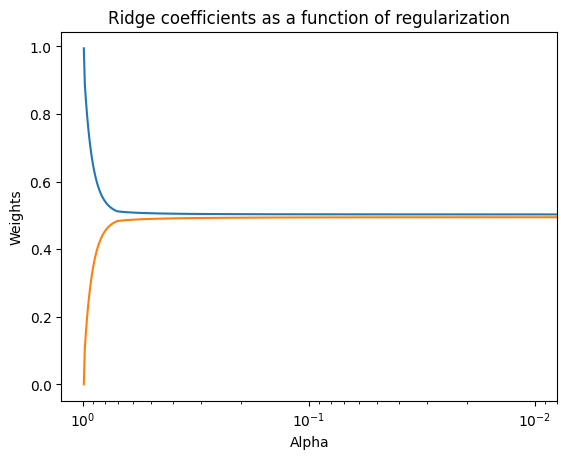

In [90]:
# Generate random data
x = [[0,0], [1, 1], [2, 2]]
y = [0, 1, 2]
x, y = np.array(x), np.array(y)

ratios = np.arange(0, 1, 0.01)

coefs = [] #Holder

# Get coefficients for each alpha
for r in ratios:
    model = ElasticNet(alpha = a, l1_ratio = r, fit_intercept=False)
    model.fit(x, y)
    coefs.append(model.coef_)

# Display results
ax = plt.gca() #Get current axis
ax.plot(ratios, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("Alpha")
plt.ylabel("Weights")
plt.title("Ridge coefficients as a function of regularization")
plt.axis("tight")
plt.show()

## Housing Example

In [91]:
# Load Dataset
from pandas import read_csv
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
print(dataframe.shape)
print(dataframe.head())

(506, 14)
        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


We can see that we have 506 observations across 13 predictors and 1 target variable. All are numeric.

We will start off with a 50/50 ration between L1 and L2 and an alpha of 1.

In [92]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

We will now evaluate the model using 10-fold CV and a Mean Absolute Error (`MAE`) loss (we can easily use `MSE` if we want to).
<br><br>
The CV will be done using `RepeatedKFold` where we specify the number of folds, the number of repeats and the state of randomness (give an int to get reproducable results). E.g. `RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = None)` means that we repeat 5-fold CV 10 times using no randomness.

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [117]:
data = dataframe.values
x = data[:, :-1] #Remove last row
y = data[:, -1] #Keep last row

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
print(cv)
scores = cross_val_score(model, x, y, scoring="neg_mean_absolute_error", cv = cv, n_jobs=1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

model.fit(x, y)
new_row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
y_hat = model.predict([new_row])
print(y_hat)

RepeatedKFold(n_repeats=3, n_splits=10, random_state=1)
Mean MAE: 3.682 (0.530)
[31.04693629]
